In [ ]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(suppress=True) #prevent numpy exponential

In [ ]:
"""Python libraries for learning and performing image processing."""

import ipympl
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

In [ ]:
"""Python library for reading and writing images."""

import imageio.v3 as iio

In [ ]:
eight = iio.imread(uri="eight.tif")
print(eight)

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


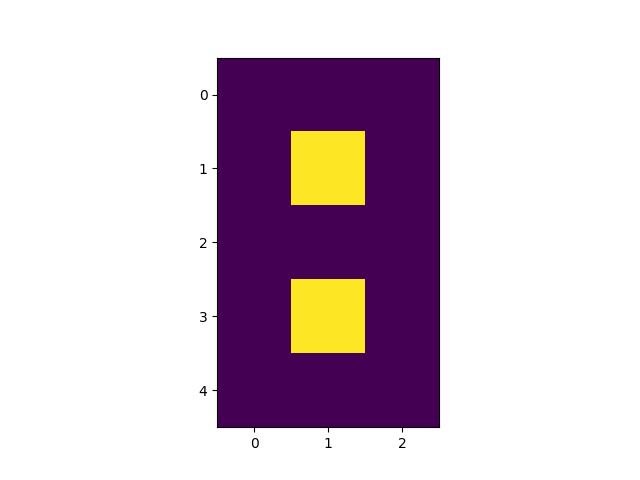

In [ ]:
fig, ax = plt.subplots()
ax.imshow(eight)

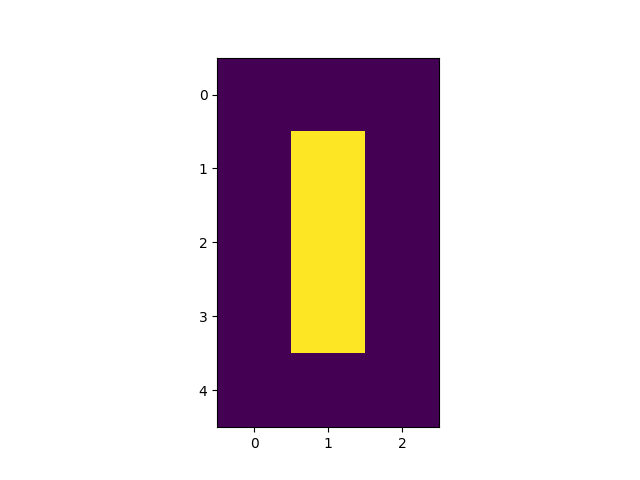

In [ ]:
zero = eight.copy()

zero[2,1] = 1.0

fig, ax = plt.subplots()
ax.imshow(zero)

[[0. 0. 0.]
 [0. 1. 1.]
 [0. 0. 0.]
 [1. 1. 0.]
 [0. 0. 0.]]


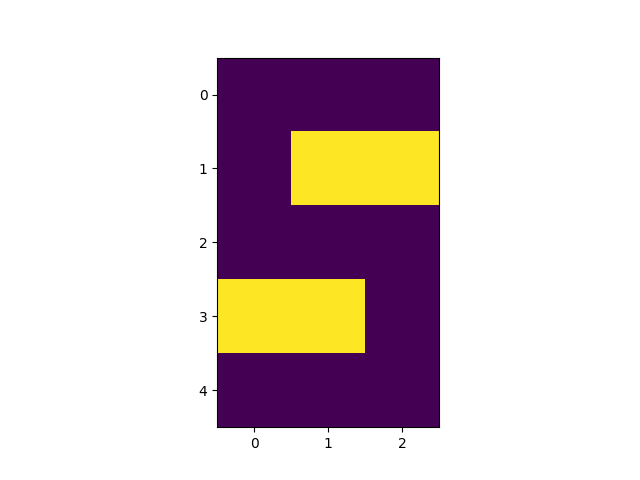

In [ ]:
five = eight.copy()

five[1, 2] = 1.0
five[3, 0] = 1.0
fig, ax = plt.subplots()
ax.imshow(five)
print(five)

[[[116  85  57]
  [128 109  94]
  [214  44  62]
  [219 157  21]]

 [[ 93 152 140]
  [246 198 102]
  [ 70  33 101]
  [  7   1 110]]

 [[225 124 229]
  [154 194 176]
  [227  63  49]
  [144 178  54]]

 [[123 180  93]
  [120   5  49]
  [166 234 142]
  [ 71  85  70]]]


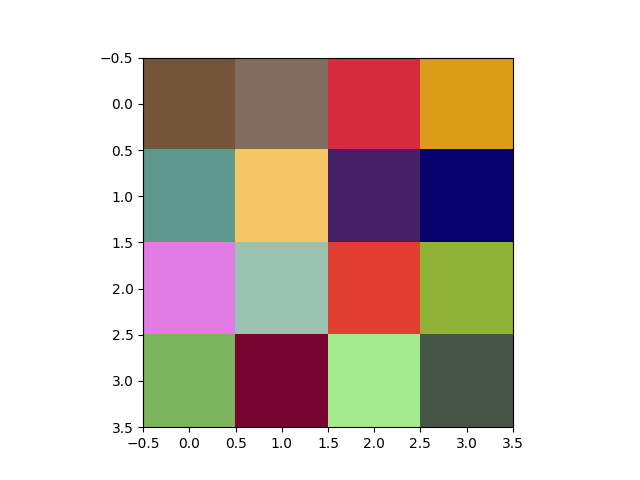

In [ ]:
# set the random seed so we all get the same matrix
pseudorandomizer = np.random.RandomState(2021)
# create a 4 × 4 checkerboard of random colours
checkerboard = pseudorandomizer.randint(0, 255, size=(4, 4, 3))
# restore the default map as you show the image
fig, ax = plt.subplots()
ax.imshow(checkerboard)
# display the arrays
print(checkerboard)

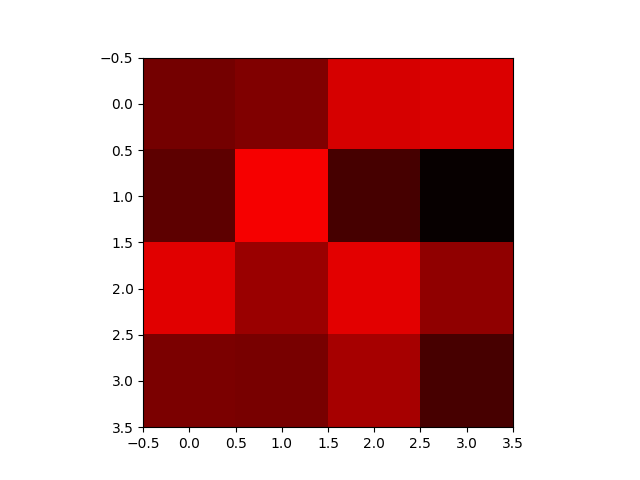

In [ ]:
red_channel = checkerboard * [1, 0, 0]
fig, ax = plt.subplots()
ax.imshow(red_channel)

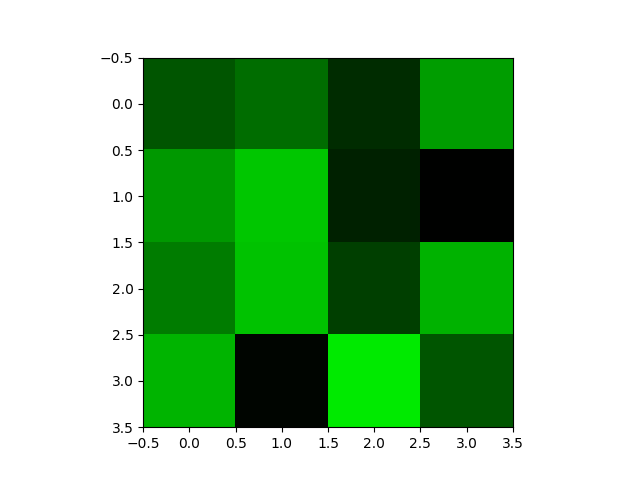

In [ ]:
green_channel = checkerboard * [0, 1, 0]
fig, ax = plt.subplots()
ax.imshow(green_channel)

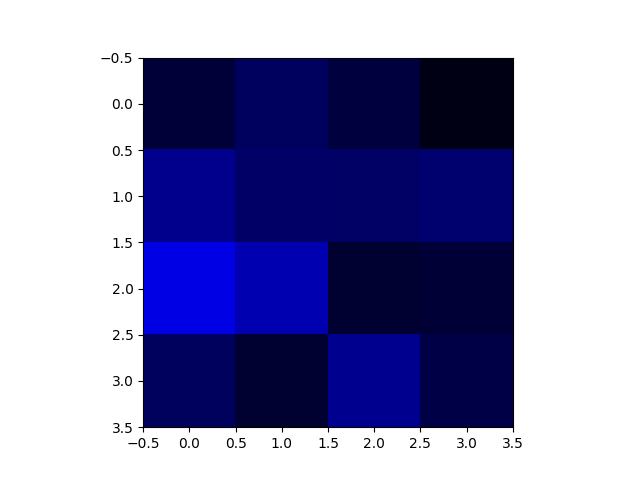

In [ ]:
blue_channel = checkerboard * [0, 0, 1]
fig, ax = plt.subplots()
ax.imshow(blue_channel)

When loading an image with imageio, in certain situations the image is stored in a read-only array. If you attempt to manipulate the pixels in a read-only array, you will receive an error message ValueError: assignment destination is read-only. In order to make the image array writeable, we can create a copy with image = np.array(image) before manipulating the pixel values.

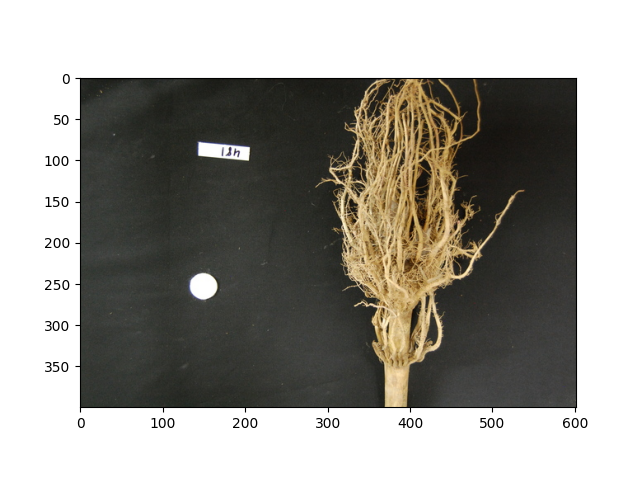

In [ ]:
# read input image
maize_roots = iio.imread(uri="maize-root-cluster.jpg")
maize_roots = np.array(maize_roots)

# display original image
fig, ax = plt.subplots()
ax.imshow(maize_roots)

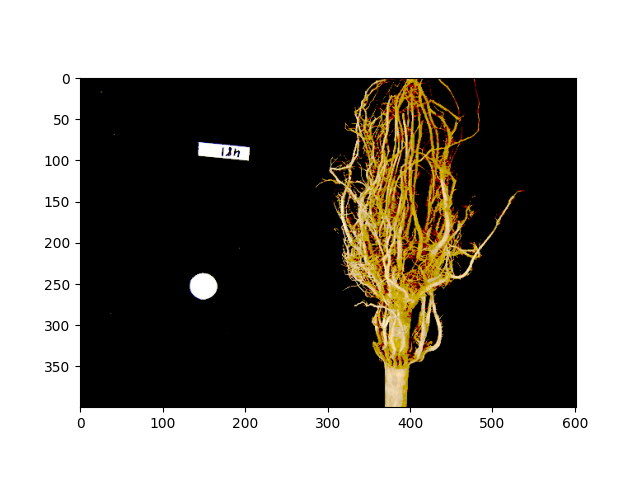

In [ ]:
maize_roots[maize_roots < 128] = 0

# display modified image
fig, ax = plt.subplots()
ax.imshow(maize_roots)

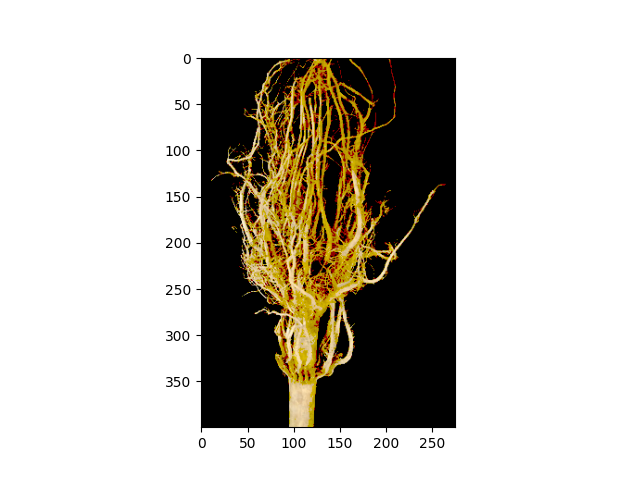

In [ ]:
# extract and display sub-image
clipped_maize = maize_roots[0:400, 275:550, :]
fig, ax = plt.subplots()
ax.imshow(clipped_maize)


# save sub-image
iio.imwrite(uri="clipped_maize.jpg", image=clipped_maize)

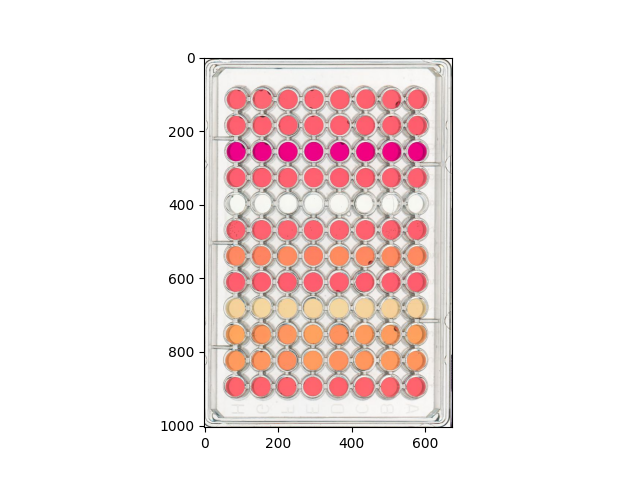

In [ ]:
# Load the image
wellplate = iio.imread(uri="wellplate-01.jpg")
wellplate = np.array(wellplate)

# Display the image
fig, ax = plt.subplots()
ax.imshow(wellplate)

<ipython-input-40-e5f5f5ca99c8>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


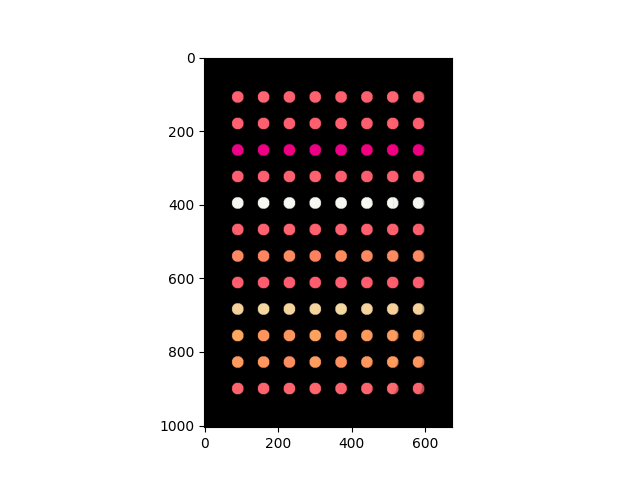

In [ ]:
# load the well coordinates as a NumPy array
centers = np.loadtxt("centers.txt", delimiter=" ")

# read in original image
wellplate = iio.imread(uri="wellplate-01.jpg")
wellplate = np.array(wellplate)

# create the mask image
mask = np.ones(shape=wellplate.shape[0:2], dtype="bool")

# iterate through the well coordinates
for cx, ry in centers:
    # draw a circle on the mask at the well center
    rr, cc = ski.draw.disk(center=(ry, cx), radius=16, shape=wellplate.shape[:2])
    mask[rr, cc] = False

# apply the mask
wellplate[mask] = [0, 0, 0]

# display the result
fig, ax = plt.subplots()
ax.imshow(wellplate)

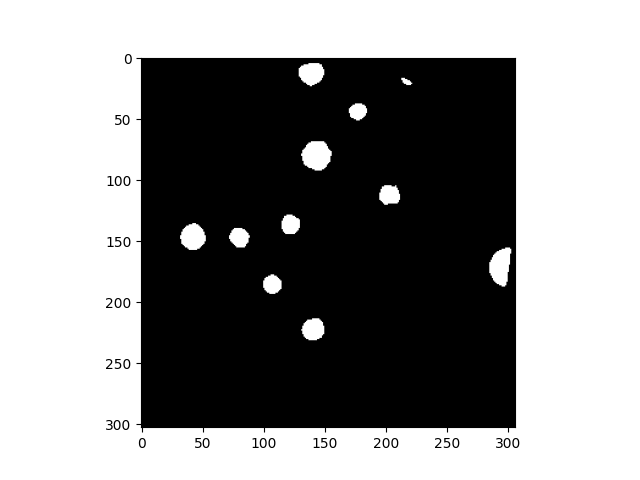

In [ ]:
bacteria = iio.imread(uri="colonies-01.tif")
gray_image = ski.color.rgb2gray(bacteria)
blurred_image = ski.filters.gaussian(gray_image, sigma=1.0)

t = 0.2
binary_mask = blurred_image < t

fig, ax = plt.subplots()
ax.imshow(binary_mask, cmap="gray")